## Dolphin social network

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import random
import plotly.graph_objs as go
from collections import defaultdict

In [2]:
G = nx.read_gml('dolphins/dolphins.gml')

### Grafo dei delfini di Doubtful Sound

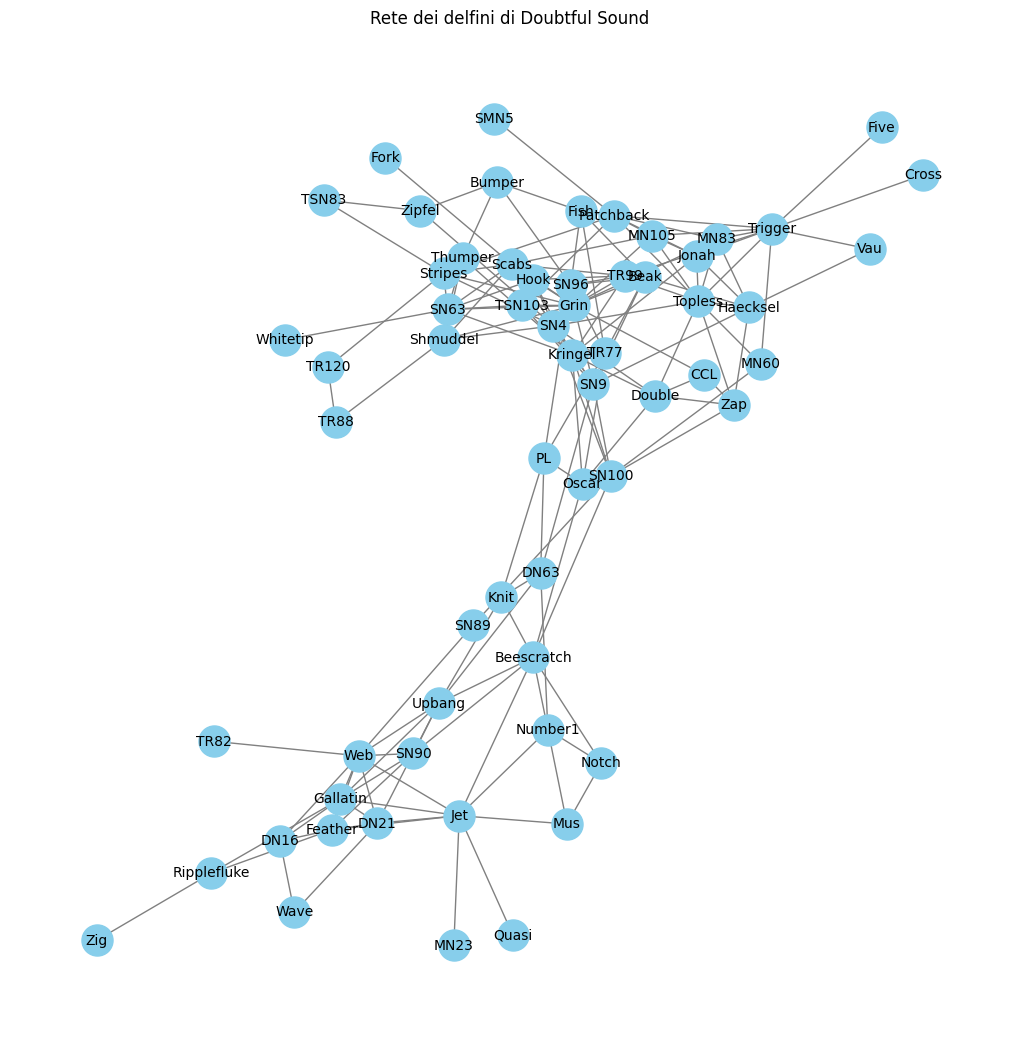

In [3]:
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
plt.title("Rete dei delfini di Doubtful Sound")
plt.show()


# Analysis

### Descriptive Analysis

In [4]:
G.nodes

NodeView(('Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel'))

In [5]:
G.edges

EdgeView([('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL', 'Zap'), ('Cross', 'Trigger'), ('DN16', 'Feather'), ('DN16', 'Gallatin'), ('DN16', 'Wave'), ('DN16', 'Web'), ('DN21', 'Feather'), ('DN21', 'Gallatin'), ('DN21', 'Jet'), ('DN21', 'Upbang'), ('DN21', 'Wave'), ('DN21', 'Web'), ('DN63', 'Knit'), ('DN63', 'Number1'), ('DN63', 'PL'), ('DN63', 'SN9'), ('DN63', 'Upbang'), ('Double', 'Kringel'), ('Double', 'Oscar'), ('Double', 'SN4'), ('Double', 'Topless'), ('Double', 'Zap'), ('Feather', 'Gallatin'), ('Feather', 'Jet'), ('Feather', 'Ripplefluke'), ('Feather', 'SN90'), ('Feather', 'Web'), ('Fish', 'Patchba

In [6]:
G.is_directed()  # per scoprire se il grafo è diretto o indiretto

False

In [7]:
print("Numero di nodi: ", G.number_of_nodes())
print("Numero di archi: ", G.number_of_edges())

Numero di nodi:  62
Numero di archi:  159


In [8]:
components = list(nx.connected_components(G))
print(f'Numero di componenti connesse: {len(components)}')

Numero di componenti connesse: 1


In [9]:
average_path_length = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)
print(f'Lunghezza media del cammino più breve: {average_path_length:.2f}')
print(f'Diametro della rete: {diameter}')

Lunghezza media del cammino più breve: 3.36
Diametro della rete: 8


In [10]:
density = nx.density(G)
print(f'Densità della rete: {density}')

Densità della rete: 0.08408249603384453


In [11]:
# Calcolare il grado di ciascun nodo (numero di connessioni per ogni delfino)
degree_dict = dict(G.degree())
# print(degree_dict)

# Creare una lista di tuple (nodo, grado) e ordinare in base al grado decrescente
sorted_degrees = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Stampare i nodi ordinati per grado
print("Nodi ordinati per grado (dal più alto al più basso):")
for node, degree in sorted_degrees:
    print(f"Nodo: {node}, Grado: {degree}")
    

Nodi ordinati per grado (dal più alto al più basso):
Nodo: Grin, Grado: 12
Nodo: SN4, Grado: 11
Nodo: Topless, Grado: 11
Nodo: Scabs, Grado: 10
Nodo: Trigger, Grado: 10
Nodo: Jet, Grado: 9
Nodo: Kringel, Grado: 9
Nodo: Patchback, Grado: 9
Nodo: Web, Grado: 9
Nodo: Beescratch, Grado: 8
Nodo: Gallatin, Grado: 8
Nodo: SN63, Grado: 8
Nodo: SN9, Grado: 8
Nodo: Feather, Grado: 7
Nodo: Haecksel, Grado: 7
Nodo: Jonah, Grado: 7
Nodo: SN100, Grado: 7
Nodo: Stripes, Grado: 7
Nodo: TR99, Grado: 7
Nodo: Upbang, Grado: 7
Nodo: Beak, Grado: 6
Nodo: DN21, Grado: 6
Nodo: Double, Grado: 6
Nodo: Hook, Grado: 6
Nodo: MN105, Grado: 6
Nodo: MN83, Grado: 6
Nodo: SN96, Grado: 6
Nodo: TR77, Grado: 6
Nodo: DN63, Grado: 5
Nodo: Fish, Grado: 5
Nodo: Number1, Grado: 5
Nodo: Oscar, Grado: 5
Nodo: PL, Grado: 5
Nodo: Shmuddel, Grado: 5
Nodo: SN90, Grado: 5
Nodo: Zap, Grado: 5
Nodo: Bumper, Grado: 4
Nodo: DN16, Grado: 4
Nodo: Knit, Grado: 4
Nodo: Thumper, Grado: 4
Nodo: TSN103, Grado: 4
Nodo: CCL, Grado: 3
Nodo: MN60,

### Grafico dove viene rappresentato ogni nodo con un determinato colore in base al numero di connessioni che hanno

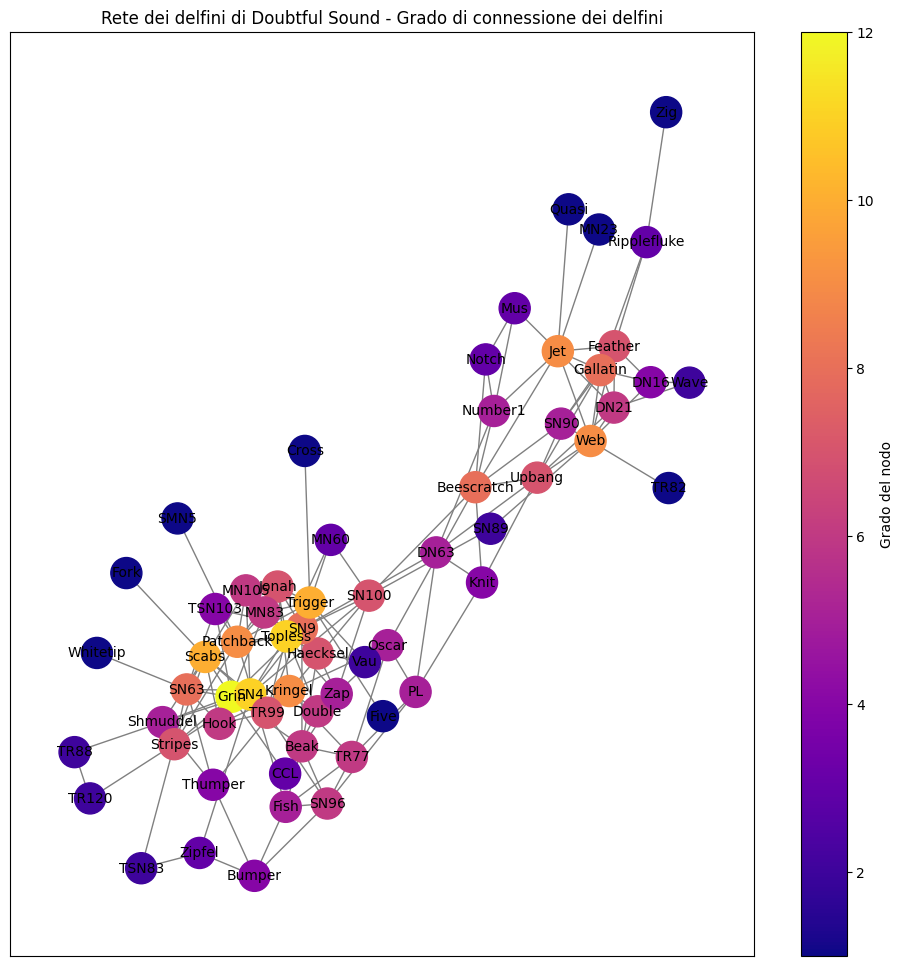

In [12]:
# Definire i colori dei nodi basati sul grado
colors = [degree_dict[node] for node in G.nodes()]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color=colors, cmap=plt.cm.plasma) # Nodi con colori basati sul loro grado
edges = nx.draw_networkx_edges(G, pos, edge_color="gray")
labels = nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Barra colori
plt.colorbar(nodes, label='Grado del nodo')
plt.title("Rete dei delfini di Doubtful Sound - Grado di connessione dei delfini")
plt.show()

## Centrality Measures

In [13]:
# Calcolare la centralità di grado per calcolare l'importanza di ciascun nodo
degree_centrality = nx.degree_centrality(G)

# Ordinare i nodi per centralità di grado (dal più alto al più basso)
sorted_degree_centrality = {k: v for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)}

print("Degree centrality (dalla più grande alla più piccola):")
for node, centrality in sorted_degree_centrality.items():
    print(f"Nodo {node}: {centrality:.4f}")

Degree centrality (dalla più grande alla più piccola):
Nodo Grin: 0.1967
Nodo SN4: 0.1803
Nodo Topless: 0.1803
Nodo Scabs: 0.1639
Nodo Trigger: 0.1639
Nodo Jet: 0.1475
Nodo Kringel: 0.1475
Nodo Patchback: 0.1475
Nodo Web: 0.1475
Nodo Beescratch: 0.1311
Nodo Gallatin: 0.1311
Nodo SN63: 0.1311
Nodo SN9: 0.1311
Nodo Feather: 0.1148
Nodo Haecksel: 0.1148
Nodo Jonah: 0.1148
Nodo SN100: 0.1148
Nodo Stripes: 0.1148
Nodo TR99: 0.1148
Nodo Upbang: 0.1148
Nodo Beak: 0.0984
Nodo DN21: 0.0984
Nodo Double: 0.0984
Nodo Hook: 0.0984
Nodo MN105: 0.0984
Nodo MN83: 0.0984
Nodo SN96: 0.0984
Nodo TR77: 0.0984
Nodo DN63: 0.0820
Nodo Fish: 0.0820
Nodo Number1: 0.0820
Nodo Oscar: 0.0820
Nodo PL: 0.0820
Nodo Shmuddel: 0.0820
Nodo SN90: 0.0820
Nodo Zap: 0.0820
Nodo Bumper: 0.0656
Nodo DN16: 0.0656
Nodo Knit: 0.0656
Nodo Thumper: 0.0656
Nodo TSN103: 0.0656
Nodo CCL: 0.0492
Nodo MN60: 0.0492
Nodo Mus: 0.0492
Nodo Notch: 0.0492
Nodo Ripplefluke: 0.0492
Nodo Zipfel: 0.0492
Nodo SN89: 0.0328
Nodo TR120: 0.0328
Nodo

In [14]:
# Calcolare la centralità di betweenness per calcolare l'importanza di ciascun nodo
betweenness_centrality = nx.betweenness_centrality(G)

# Ordinare i nodi per centralità di betweenness (dal più alto al più basso)
sorted_betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

print("Betweenness centrality (dalla più grande alla più piccola):")
for node, centrality in sorted_betweenness_centrality.items():
    print(f"Nodo {node}: {centrality:.4f}")

Betweenness centrality (dalla più grande alla più piccola):
Nodo SN100: 0.2482
Nodo Beescratch: 0.2133
Nodo SN9: 0.1431
Nodo SN4: 0.1386
Nodo DN63: 0.1182
Nodo Jet: 0.1143
Nodo Kringel: 0.1026
Nodo Upbang: 0.0991
Nodo Trigger: 0.0847
Nodo Web: 0.0842
Nodo SN89: 0.0705
Nodo Oscar: 0.0668
Nodo Patchback: 0.0655
Nodo Stripes: 0.0628
Nodo Grin: 0.0620
Nodo Scabs: 0.0572
Nodo Gallatin: 0.0528
Nodo SN63: 0.0454
Nodo MN60: 0.0422
Nodo Topless: 0.0407
Nodo TR99: 0.0334
Nodo Haecksel: 0.0333
Nodo PL: 0.0331
Nodo Ripplefluke: 0.0328
Nodo Shmuddel: 0.0327
Nodo DN21: 0.0294
Nodo Number1: 0.0292
Nodo SN96: 0.0292
Nodo SN90: 0.0233
Nodo TR77: 0.0232
Nodo Double: 0.0224
Nodo Feather: 0.0209
Nodo Zap: 0.0203
Nodo TSN103: 0.0192
Nodo Beak: 0.0191
Nodo Fish: 0.0161
Nodo Jonah: 0.0149
Nodo Zipfel: 0.0142
Nodo Knit: 0.0133
Nodo MN105: 0.0127
Nodo Thumper: 0.0120
Nodo Bumper: 0.0091
Nodo MN83: 0.0074
Nodo DN16: 0.0044
Nodo Notch: 0.0044
Nodo Hook: 0.0033
Nodo TR120: 0.0030
Nodo CCL: 0.0024
Nodo Mus: 0.0016

In [15]:
# Calcolare la centralità di closeness
closeness_centrality = nx.closeness_centrality(G)

# Ordinare la centralità di closeness dalla più grande alla più piccola
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)

print("Closeness centrality (dalla più grande alla più piccola):")
for node, closeness in sorted_closeness:
    print(f"{node}: {closeness:.4f}")

Closeness centrality (dalla più grande alla più piccola):
SN100: 0.4178
SN9: 0.4040
SN4: 0.3987
Kringel: 0.3910
Grin: 0.3765
Beescratch: 0.3720
DN63: 0.3653
Oscar: 0.3653
Scabs: 0.3653
Double: 0.3631
TR99: 0.3506
Beak: 0.3466
Topless: 0.3466
TSN103: 0.3427
Zap: 0.3427
Haecksel: 0.3389
TR77: 0.3389
Jonah: 0.3370
Stripes: 0.3370
SN89: 0.3352
MN105: 0.3333
MN60: 0.3333
Hook: 0.3297
SN63: 0.3297
SN96: 0.3297
Trigger: 0.3297
Upbang: 0.3245
Patchback: 0.3228
PL: 0.3228
Knit: 0.3161
Number1: 0.3161
Shmuddel: 0.3161
Fish: 0.3128
MN83: 0.3128
Thumper: 0.3112
Jet: 0.3096
CCL: 0.3081
Web: 0.3020
Zipfel: 0.3020
SN90: 0.2976
Bumper: 0.2824
Notch: 0.2773
Gallatin: 0.2711
Vau: 0.2711
Fork: 0.2687
DN21: 0.2675
TSN83: 0.2596
TR120: 0.2563
Mus: 0.2552
Feather: 0.2521
Cross: 0.2490
Five: 0.2490
Whitetip: 0.2490
TR88: 0.2470
SMN5: 0.2450
DN16: 0.2383
MN23: 0.2374
Quasi: 0.2374
TR82: 0.2328
Ripplefluke: 0.2163
Wave: 0.2133
Zig: 0.1784


In [16]:
# Calcolare la centralità di eigenvector
eigenvector_centrality = nx.eigenvector_centrality(G)

# Ordinare la centralità di eigenvector dalla più grande alla più piccola
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)

print("Eigenvector centrality (dalla più grande alla più piccola):")
for node, eigenvector in sorted_eigenvector:
    print(f"{node}: {eigenvector:.4f}")

Eigenvector centrality (dalla più grande alla più piccola):
Grin: 0.3158
SN4: 0.3006
Topless: 0.2850
Scabs: 0.2811
TR99: 0.2177
Patchback: 0.2118
Trigger: 0.2107
Hook: 0.2080
SN9: 0.2079
MN105: 0.2073
Jonah: 0.2025
SN63: 0.1966
MN83: 0.1932
Stripes: 0.1903
Kringel: 0.1845
Haecksel: 0.1642
Double: 0.1431
Shmuddel: 0.1388
SN100: 0.1328
TSN103: 0.1296
Beak: 0.1285
Zap: 0.1118
MN60: 0.0874
SN96: 0.0810
TR77: 0.0804
CCL: 0.0793
Thumper: 0.0778
Fish: 0.0753
Oscar: 0.0682
Vau: 0.0521
Zipfel: 0.0520
DN63: 0.0429
Beescratch: 0.0421
PL: 0.0408
Bumper: 0.0398
Fork: 0.0391
TSN83: 0.0337
TR120: 0.0297
SMN5: 0.0294
Cross: 0.0293
Five: 0.0293
Whitetip: 0.0273
TR88: 0.0234
Upbang: 0.0230
SN89: 0.0209
Knit: 0.0207
Jet: 0.0175
Web: 0.0174
Number1: 0.0163
SN90: 0.0153
Gallatin: 0.0150
Feather: 0.0122
DN21: 0.0122
Notch: 0.0089
DN16: 0.0066
Mus: 0.0060
Ripplefluke: 0.0039
Wave: 0.0026
MN23: 0.0024
Quasi: 0.0024
TR82: 0.0024
Zig: 0.0005


In [17]:
# Calcolare la Load Centrality
load_centrality = nx.load_centrality(G)

# Ordinare la Load Centrality dalla più grande alla più piccola
sorted_load_centrality = sorted(load_centrality.items(), key=lambda item: item[1], reverse=True)

print("Load centrality (dalla più grande alla più piccola):")
for node, load in sorted_load_centrality:
    print(f"{node}: {load:.4f}")

Load centrality (dalla più grande alla più piccola):
SN100: 0.2401
Beescratch: 0.1992
SN9: 0.1496
SN4: 0.1343
DN63: 0.1280
Jet: 0.1108
Upbang: 0.1005
Kringel: 0.0998
Web: 0.0892
Trigger: 0.0856
SN89: 0.0757
Patchback: 0.0672
Oscar: 0.0662
Grin: 0.0629
Stripes: 0.0624
Scabs: 0.0584
Gallatin: 0.0533
SN63: 0.0451
MN60: 0.0419
Topless: 0.0373
Haecksel: 0.0337
Ripplefluke: 0.0328
TR99: 0.0321
Number1: 0.0321
PL: 0.0319
Shmuddel: 0.0319
SN96: 0.0295
DN21: 0.0279
TR77: 0.0234
Double: 0.0229
TSN103: 0.0219
Feather: 0.0211
SN90: 0.0204
Beak: 0.0195
Zap: 0.0191
Fish: 0.0171
Jonah: 0.0157
Zipfel: 0.0154
Knit: 0.0125
Thumper: 0.0123
MN105: 0.0122
Bumper: 0.0101
MN83: 0.0073
DN16: 0.0060
Notch: 0.0044
TR120: 0.0038
Hook: 0.0031
CCL: 0.0029
Mus: 0.0017
TSN83: 0.0012
TR88: 0.0010
Vau: 0.0009
Wave: 0.0001
Cross: 0.0000
Five: 0.0000
Fork: 0.0000
MN23: 0.0000
Quasi: 0.0000
SMN5: 0.0000
TR82: 0.0000
Whitetip: 0.0000
Zig: 0.0000


In [18]:
# Top 5 nodi per centralità di grado
top_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di grado:", top_degree)

# Top 5 nodi per centralità di betweenness
top_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di betweenness:", top_betweenness)

# Top 5 nodi per centralità di closeness
top_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di closeness:", top_closeness)

# Top 5 nodi per centralità di eigenvector
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di eigenvector:", top_eigenvector)

# Top 5 nodi per centralità di eigenvector
top_load = sorted(load_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di load:", top_load)

Top 5 nodi per centralità di grado: [('Grin', 12), ('SN4', 11), ('Topless', 11), ('Scabs', 10), ('Trigger', 10)]
Top 5 nodi per centralità di betweenness: [('SN100', 0.24823719602893804), ('Beescratch', 0.21332443553281097), ('SN9', 0.1431495183426175), ('SN4', 0.13856978865859435), ('DN63', 0.11823861926938342)]
Top 5 nodi per centralità di closeness: [('SN100', 0.4178082191780822), ('SN9', 0.40397350993377484), ('SN4', 0.39869281045751637), ('Kringel', 0.391025641025641), ('Grin', 0.3765432098765432)]
Top 5 nodi per centralità di eigenvector: [('Grin', 0.3157810764804676), ('SN4', 0.3005609284704956), ('Topless', 0.28500310473240437), ('Scabs', 0.281097017160587), ('TR99', 0.21769051331081507)]
Top 5 nodi per centralità di load: [('SN100', 0.24014528580102343), ('Beescratch', 0.19919624786769607), ('SN9', 0.14959271908520544), ('SN4', 0.134280987076069), ('DN63', 0.12800260936189894)]


# Altre analisi 

### Coefficiente di clustering

In [19]:
# Calcolare il coefficiente di clustering (per individuare le comunità di delfini)
clustering_coefficient = nx.average_clustering(G)
print(f"Coefficiente di clustering: {clustering_coefficient:.4f}")

Coefficiente di clustering: 0.2590


### Identificazione delle comunità usando Louvain

Valori delle partizioni:
{'Beak': 0, 'Beescratch': 1, 'Bumper': 0, 'CCL': 2, 'Cross': 3, 'DN16': 1, 'DN21': 1, 'DN63': 0, 'Double': 2, 'Feather': 1, 'Fish': 0, 'Five': 3, 'Fork': 4, 'Gallatin': 1, 'Grin': 4, 'Haecksel': 3, 'Hook': 4, 'Jet': 1, 'Jonah': 3, 'Knit': 0, 'Kringel': 2, 'MN105': 3, 'MN23': 1, 'MN60': 3, 'MN83': 3, 'Mus': 1, 'Notch': 1, 'Number1': 1, 'Oscar': 2, 'Patchback': 3, 'PL': 0, 'Quasi': 1, 'Ripplefluke': 1, 'Scabs': 4, 'Shmuddel': 4, 'SMN5': 3, 'SN100': 2, 'SN4': 4, 'SN63': 4, 'SN89': 2, 'SN9': 4, 'SN90': 1, 'SN96': 0, 'Stripes': 4, 'Thumper': 4, 'Topless': 3, 'TR120': 4, 'TR77': 0, 'TR82': 1, 'TR88': 4, 'TR99': 4, 'Trigger': 3, 'TSN103': 4, 'TSN83': 4, 'Upbang': 1, 'Vau': 3, 'Wave': 1, 'Web': 1, 'Whitetip': 4, 'Zap': 2, 'Zig': 1, 'Zipfel': 4}
Numero di comunità trovate: 5


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_1613/468807373.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.get_cmap('viridis', num_communities), node_size=500)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


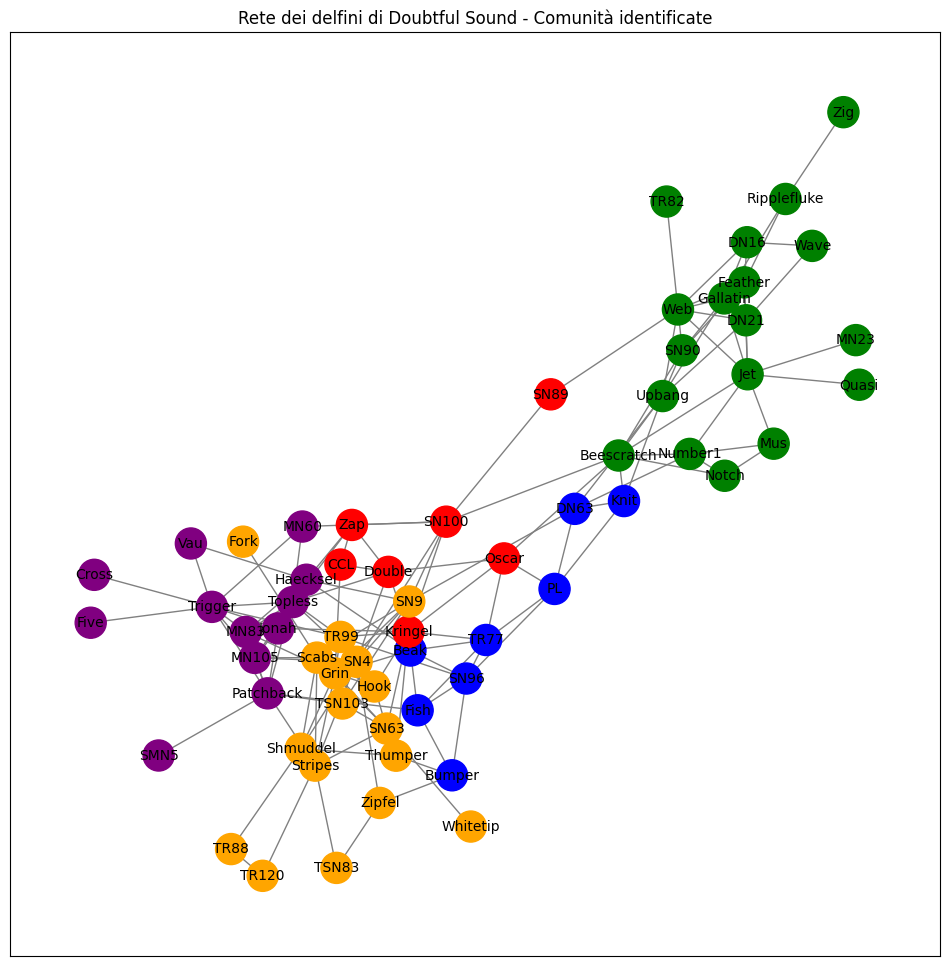

In [20]:
# Trovare le comunità usando l'algoritmo Louvain
partition = community_louvain.best_partition(G)

# Stampare i valori delle partizioni (ad ogni delfino viene assegnato un valore)
print("Valori delle partizioni:")
print(partition)
print("Numero di comunità trovate:", len(set(partition.values())))

# Aggiungere l'informazione delle comunità ai nodi
nx.set_node_attributes(G, partition, 'community')

# Lista dei colori delle comunità
community_colors = ['blue', 'green', 'red', 'purple', 'orange']

# Trovare il numero di comunità
num_communities = len(set(partition.values()))

# Disegnare la rete con colori diversi per ciascuna comunità
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed=42)  # Imposta il seed per riproducibilità della disposizione

# Creare una lista di colori per i nodi in base alle comunità
node_colors = [community_colors[partition[node]] for node in G.nodes()]

# Disegnare i nodi e gli archi
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.get_cmap('viridis', num_communities), node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Rete dei delfini di Doubtful Sound - Comunità identificate")
plt.show()

### Modularità

In [21]:
# Calculate modularity
modularity = community_louvain.modularity(partition, G)
print(f"Modularity of the network: {modularity:.4f}")

Modularity of the network: 0.5241


Ponti trovati:
('Cross', 'Trigger')
('Five', 'Trigger')
('Fork', 'Scabs')
('Jet', 'MN23')
('Jet', 'Quasi')
('Patchback', 'SMN5')
('Ripplefluke', 'Zig')
('SN63', 'Whitetip')
('TR82', 'Web')


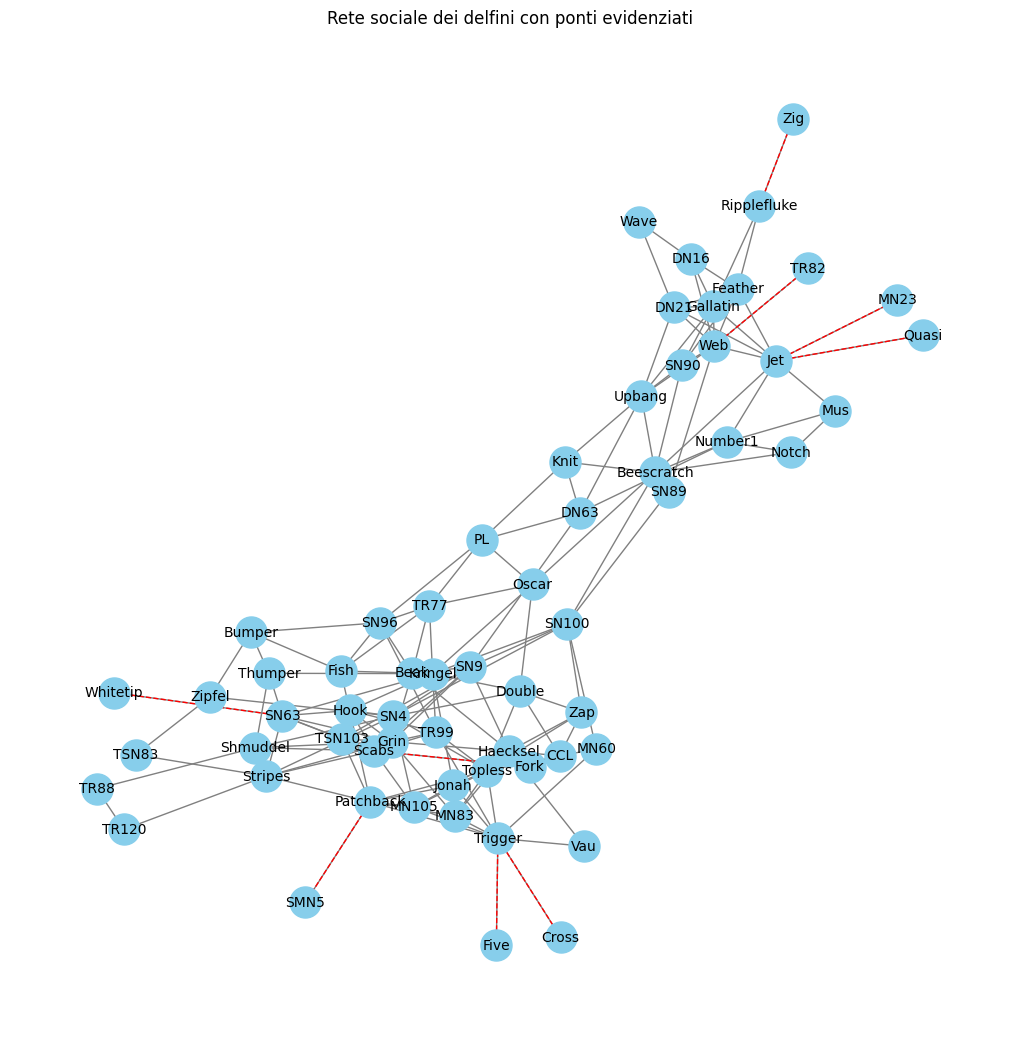

In [22]:
# Trova tutti i ponti nel grafo
bridges = list(nx.bridges(G))

# Stampa i ponti trovati
print("Ponti trovati:")
for bridge in bridges:
    print(bridge)

# Visualizza la rete con i ponti evidenziati
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)

# Evidenzia i ponti con il colore rosso
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
nx.draw_networkx_edges(G, pos, edgelist=bridges, edge_color='r', style='dashed')
plt.title("Rete sociale dei delfini con ponti evidenziati")
plt.show()


## Gruppi di nodi

### Clique

In [23]:
# Trovare tutte le clique massimali nella rete
cliques = list(nx.find_cliques(G))

# Ordinare le clique per dimensione (numero di nodi)
sorted_cliques = sorted(cliques, key=len, reverse=True)

print("Top 5 clique per dimensione:")
for i, clique in enumerate(sorted_cliques[:5]):
    print(f"Clique {i+1}: {clique}")

Top 5 clique per dimensione:
Clique 1: ['Topless', 'Trigger', 'Jonah', 'Patchback', 'MN83']
Clique 2: ['Topless', 'Trigger', 'Jonah', 'Patchback', 'MN105']
Clique 3: ['Web', 'Gallatin', 'Feather', 'Jet', 'DN21']
Clique 4: ['Topless', 'Haecksel', 'Jonah', 'MN83']
Clique 5: ['Web', 'Gallatin', 'Feather', 'SN90']


### Visualizzazione grafica di tutte le clique separatamente e nell'intera rete

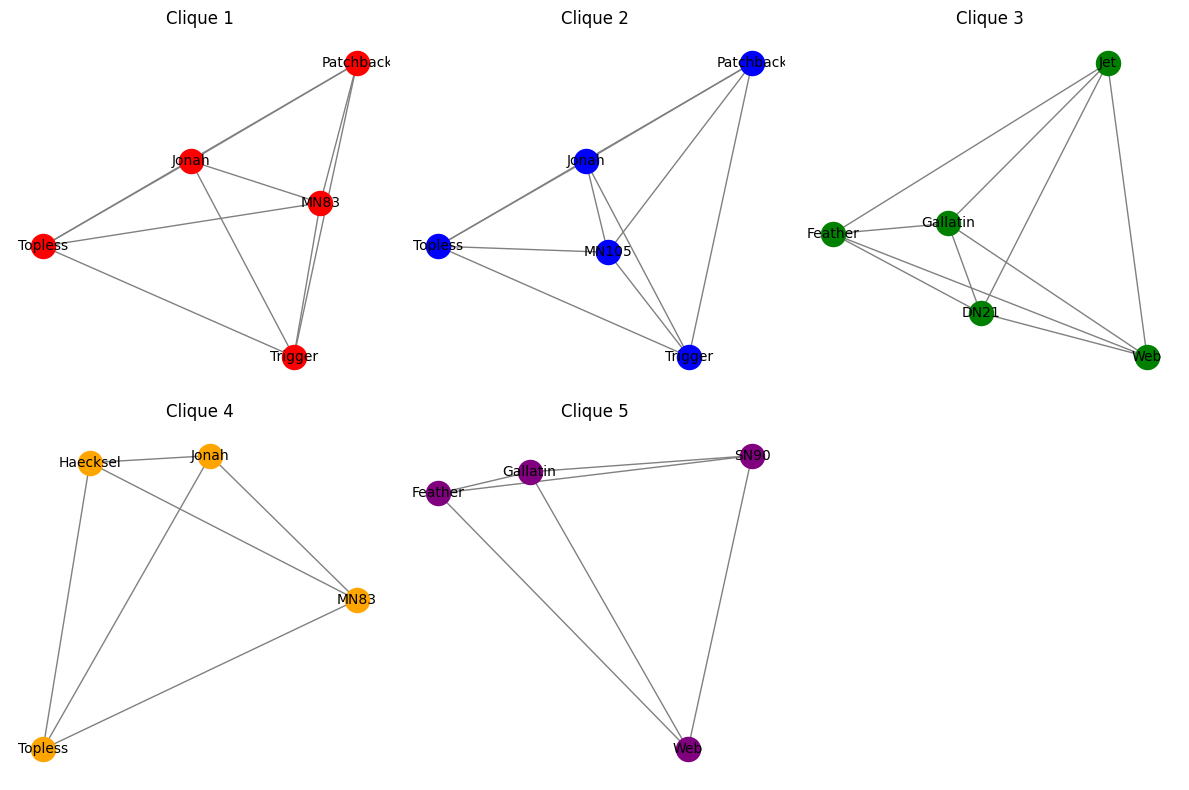

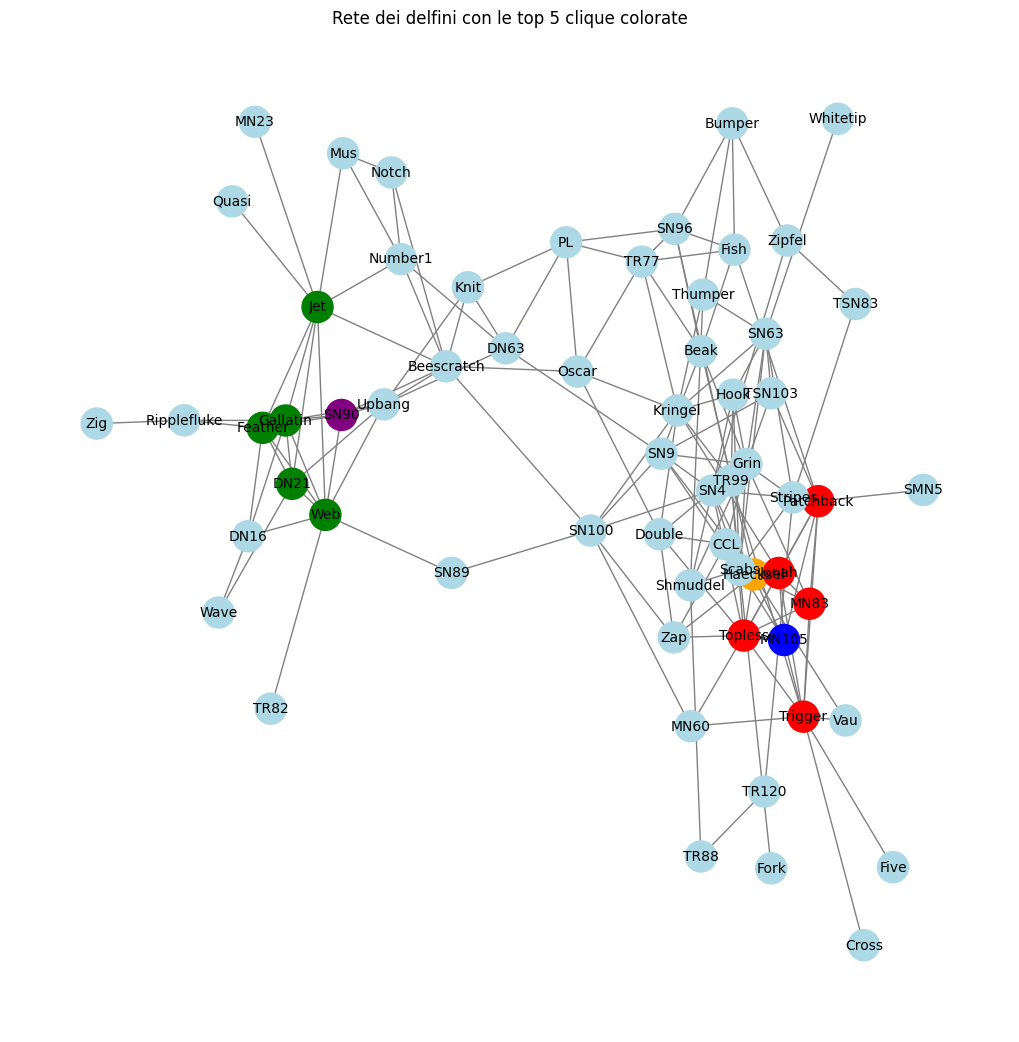

In [24]:
# Prendere le prime 5 clique per dimensione
top_5_cliques = sorted_cliques[:5]

# Calcolare la disposizione dei nodi per l'intera rete
pos = nx.spring_layout(G)

colors = ['red', 'blue', 'green', 'orange', 'purple']

# Grafo per ogni clique
plt.figure(figsize=(12, 8))
for i, clique_nodes in enumerate(top_5_cliques):
    subgraph = G.subgraph(clique_nodes)
    plt.subplot(2, 3, i + 1)
    nx.draw(subgraph, pos, with_labels=True, node_color=colors[i], edge_color="gray", font_size=10, font_color="black")
    plt.title(f"Clique {i + 1}")

plt.tight_layout()
plt.show()

# Disegnare l'intera rete con le clique colorate
plt.figure(figsize=(10, 10))
node_colors = []
for node in G.nodes():
    for i, clique_nodes in enumerate(top_5_cliques):
        if node in clique_nodes:
            node_colors.append(colors[i])
            break
    else:
        node_colors.append('lightblue')  # Colore per i nodi che NON appartengono alle top 5 clique

nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color="gray", font_size=10, font_color="black")
plt.title("Rete dei delfini con le top 5 clique colorate")
plt.show()

### Core numbers e K-core

In [25]:
# Calcola il core numbers per ogni nodo
core_numbers = nx.core_number(G)

# Stampa il core numbers per ogni nodo
print("Core numbers:")
for node, core_number in core_numbers.items():
    print(f"Nodo {node}: core number {core_number}")

Core numbers:
Nodo Beak: core number 4
Nodo Beescratch: core number 4
Nodo Bumper: core number 3
Nodo CCL: core number 3
Nodo Cross: core number 1
Nodo DN16: core number 3
Nodo DN21: core number 4
Nodo DN63: core number 4
Nodo Double: core number 4
Nodo Feather: core number 4
Nodo Fish: core number 4
Nodo Five: core number 1
Nodo Fork: core number 1
Nodo Gallatin: core number 4
Nodo Grin: core number 4
Nodo Haecksel: core number 4
Nodo Hook: core number 4
Nodo Jet: core number 4
Nodo Jonah: core number 4
Nodo Knit: core number 4
Nodo Kringel: core number 4
Nodo MN105: core number 4
Nodo MN23: core number 1
Nodo MN60: core number 3
Nodo MN83: core number 4
Nodo Mus: core number 3
Nodo Notch: core number 3
Nodo Number1: core number 3
Nodo Oscar: core number 4
Nodo Patchback: core number 4
Nodo PL: core number 4
Nodo Quasi: core number 1
Nodo Ripplefluke: core number 2
Nodo Scabs: core number 4
Nodo Shmuddel: core number 3
Nodo SMN5: core number 1
Nodo SN100: core number 4
Nodo SN4: core 

Nodi nel K-core (K=4): ['Beak', 'Beescratch', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN83', 'Oscar', 'Patchback', 'PL', 'Scabs', 'SN100', 'SN4', 'SN63', 'SN9', 'SN90', 'SN96', 'Stripes', 'Topless', 'TR77', 'TR99', 'Trigger', 'TSN103', 'Upbang', 'Web', 'Zap']


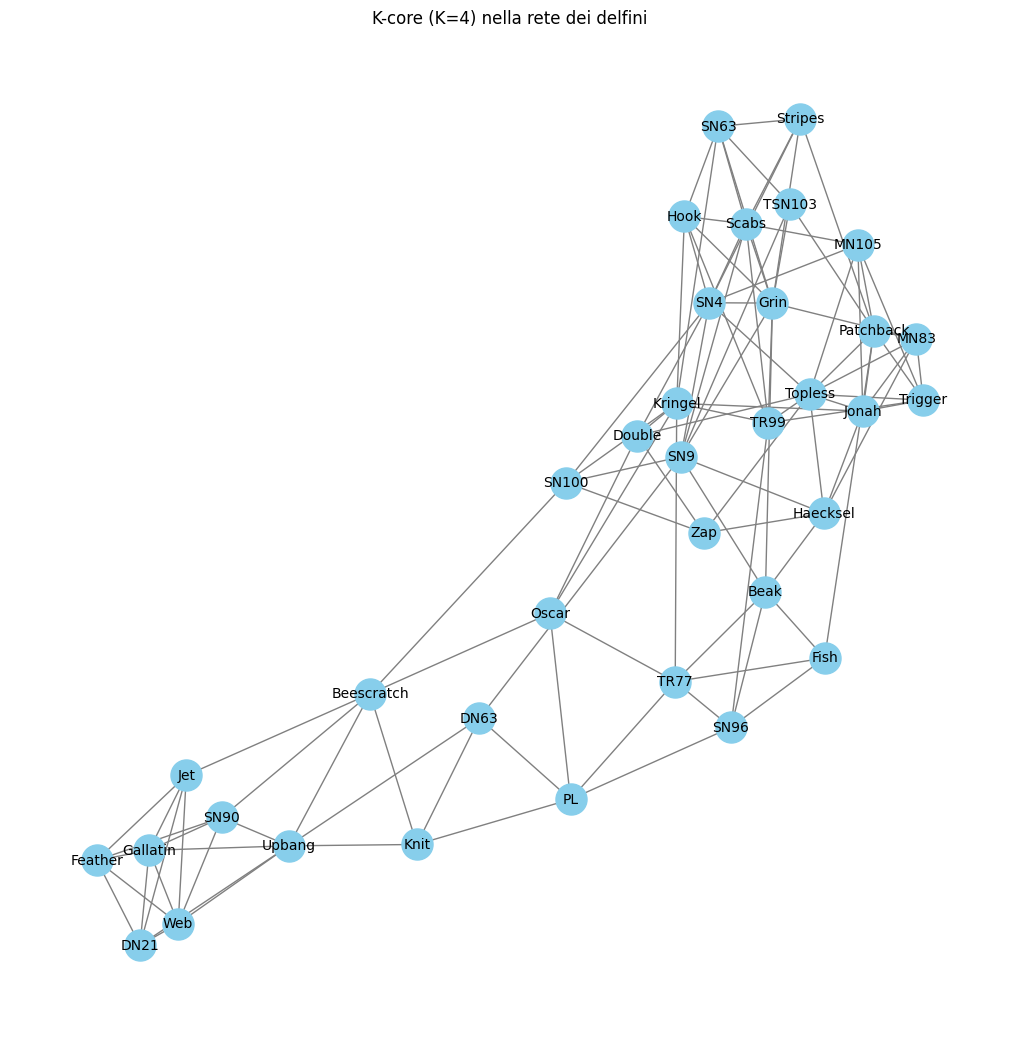

In [26]:
# Calcolare i cores della rete con k=4
k = 4
k_core = nx.k_core(G, k=k)

# Visualizzare i nodi nel K-core
core_nodes = k_core.nodes()
print(f"Nodi nel K-core (K={k}):", core_nodes)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(k_core)
nx.draw(k_core, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
plt.title(f"K-core (K={k}) nella rete dei delfini")
plt.show()

### Omofilia

In [27]:
degree_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Coefficiente di assortatività per grado: {degree_assortativity:.4f}")

Coefficiente di assortatività per grado: -0.0436


### Triadi

In [28]:
# Calcolo delle triadi in una rete non diretta
def count_triads(graph):
    triad_counts = defaultdict(int)

    for node in graph.nodes():
        neighbors = set(graph.neighbors(node))
        for neighbor in neighbors:
            # Trova l'intersezione dei vicini per trovare le triadi
            common_neighbors = neighbors & set(graph.neighbors(neighbor))

            # Conta le triadi in base alla lunghezza dell'intersezione
            for common_neighbor in common_neighbors:
                if graph.has_edge(node, common_neighbor):
                    triad_type = tuple(sorted([node, neighbor, common_neighbor]))
                    triad_counts[triad_type] += 1

    return triad_counts

triad_counts = count_triads(G)

total_triads = sum(triad_counts.values())
print(f"Numero totale di triadi: {total_triads}")

print("Distribuzione delle triadi nella rete:")
for triad_type, count in triad_counts.items():
    print(f"Triade {triad_type}: {count}")

Numero totale di triadi: 570
Distribuzione delle triadi nella rete:
Triade ('Beak', 'SN96', 'TR77'): 6
Triade ('Beak', 'Fish', 'SN96'): 6
Triade ('Beak', 'Haecksel', 'SN9'): 6
Triade ('Beak', 'Grin', 'SN9'): 6
Triade ('Beak', 'Fish', 'TR77'): 6
Triade ('Beescratch', 'Jet', 'Number1'): 6
Triade ('Beescratch', 'Notch', 'Number1'): 6
Triade ('Beescratch', 'Knit', 'Upbang'): 6
Triade ('Beescratch', 'SN90', 'Upbang'): 6
Triade ('Bumper', 'Fish', 'SN96'): 6
Triade ('CCL', 'Double', 'Zap'): 6
Triade ('DN16', 'Feather', 'Web'): 6
Triade ('DN16', 'Feather', 'Gallatin'): 6
Triade ('DN16', 'Gallatin', 'Web'): 6
Triade ('DN21', 'Feather', 'Jet'): 6
Triade ('DN21', 'Jet', 'Web'): 6
Triade ('DN21', 'Gallatin', 'Jet'): 6
Triade ('DN21', 'Feather', 'Web'): 6
Triade ('DN21', 'Feather', 'Gallatin'): 6
Triade ('DN21', 'Upbang', 'Web'): 6
Triade ('DN21', 'Gallatin', 'Web'): 6
Triade ('DN21', 'Gallatin', 'Upbang'): 6
Triade ('DN63', 'Knit', 'PL'): 6
Triade ('DN63', 'Knit', 'Upbang'): 6
Triade ('Double', 'K

## Importazione nuovo dataset con la nuova feature del sesso di alcuni delfini (una sottorete della rete iniziale)

In [29]:
sex_data = pd.read_csv('dolphins/dolphin_sex.txt', sep=', ', engine='python', header=None, names=['node', 'sex'])
# Dizionario per mappare il nodo al sesso
sex_dict = dict(zip(sex_data['node'], sex_data['sex']))

In [30]:
# Creazione della sottorete con i nodi dal file del sesso
nodes_of_interest = sex_data['node'].tolist()
subgraph = G.subgraph(nodes_of_interest).copy()

In [31]:
nodes_M = []
nodes_F = []
count_M = 0
count_F = 0

for node in subgraph.nodes():
    if sex_dict[node] == 'M':
        nodes_M.append(node)
        count_M += 1
    elif sex_dict[node] == 'F':
        nodes_F.append(node)
        count_F += 1
        
print("Delfini maschi (M):", nodes_M)
print("Numero di delfini maschili (M):", count_M)

print("Delfini femmine (F):", nodes_F)
print("Numero di delfini femminili (F):", count_F)

Delfini maschi (M): ['Beak', 'DN21', 'DN63', 'Feather', 'Gallatin', 'Haecksel', 'Jet', 'Jonah', 'Knit', 'MN105', 'MN83', 'Notch', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'SN90', 'SN96', 'Topless', 'Upbang', 'Web']
Numero di delfini maschili (M): 22
Delfini femmine (F): ['DN16', 'Double', 'Fish', 'Five', 'Grin', 'Hook', 'Kringel', 'Scabs', 'Shmuddel', 'SN4', 'SN63', 'SN89', 'Stripes', 'Trigger', 'Wave', 'Whitetip']
Numero di delfini femminili (F): 16


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


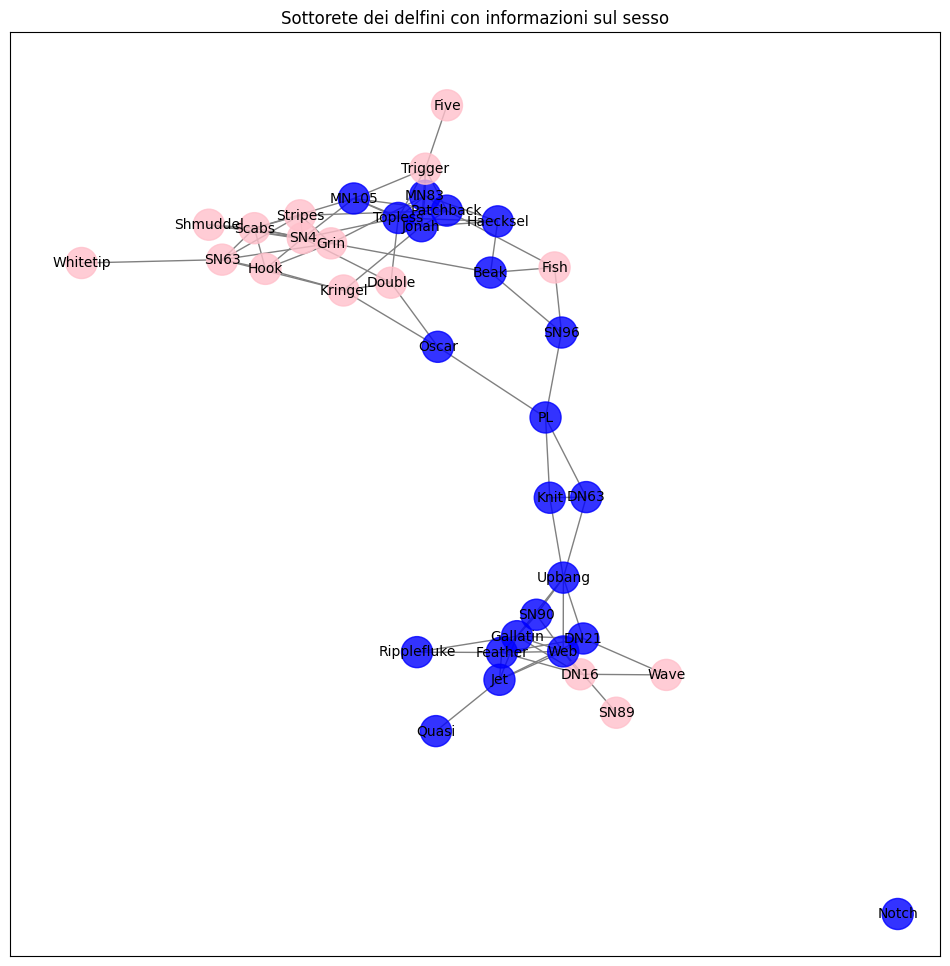

In [32]:
# Mappatura dei colori per il sesso
sex_color_map = {'M': 'blue', 'F': 'pink'}

# Lista dei colori dei nodi in base al sesso
node_colors = [sex_color_map[sex_dict[node]] for node in subgraph.nodes()]

# Disegna il grafo della sottorete con i colori dei nodi
plt.figure(figsize=(12,12))
pos = nx.spring_layout(subgraph)
nodes = nx.draw_networkx_nodes(subgraph, pos, node_size=500, node_color=node_colors, cmap=plt.cm.coolwarm, alpha=0.8)
edges = nx.draw_networkx_edges(subgraph, pos, edge_color='gray')
labels = nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color="black")

plt.title("Sottorete dei delfini con informazioni sul sesso")
plt.show()

In [33]:
# Calcolare il grado di ciascun nodo (numero di connessioni per ogni delfino)
degree_dict_sub = dict(subgraph.degree())
# print(degree_dict)

# Creare una lista di tuple (nodo, grado) e ordinare in base al grado decrescente
sorted_degrees_sub = sorted(degree_dict_sub.items(), key=lambda x: x[1], reverse=True)

# Stampare i nodi ordinati per grado
print("Nodi ordinati per grado (dal più alto al più basso):")
for node, degree in sorted_degrees_sub:
    print(f"Nodo: {node}, Grado: {degree}")
    

Nodi ordinati per grado (dal più alto al più basso):
Nodo: Gallatin, Grado: 8
Nodo: Grin, Grado: 8
Nodo: SN4, Grado: 8
Nodo: Topless, Grado: 8
Nodo: Web, Grado: 8
Nodo: Feather, Grado: 7
Nodo: Jonah, Grado: 7
Nodo: Patchback, Grado: 7
Nodo: Scabs, Grado: 7
Nodo: DN21, Grado: 6
Nodo: MN105, Grado: 6
Nodo: MN83, Grado: 6
Nodo: SN63, Grado: 6
Nodo: Trigger, Grado: 6
Nodo: Upbang, Grado: 6
Nodo: Hook, Grado: 5
Nodo: Jet, Grado: 5
Nodo: Kringel, Grado: 5
Nodo: Stripes, Grado: 5
Nodo: Beak, Grado: 4
Nodo: DN16, Grado: 4
Nodo: Double, Grado: 4
Nodo: Haecksel, Grado: 4
Nodo: PL, Grado: 4
Nodo: SN90, Grado: 4
Nodo: DN63, Grado: 3
Nodo: Fish, Grado: 3
Nodo: Knit, Grado: 3
Nodo: Oscar, Grado: 3
Nodo: Shmuddel, Grado: 3
Nodo: SN96, Grado: 3
Nodo: Ripplefluke, Grado: 2
Nodo: Wave, Grado: 2
Nodo: Five, Grado: 1
Nodo: Quasi, Grado: 1
Nodo: SN89, Grado: 1
Nodo: Whitetip, Grado: 1
Nodo: Notch, Grado: 0


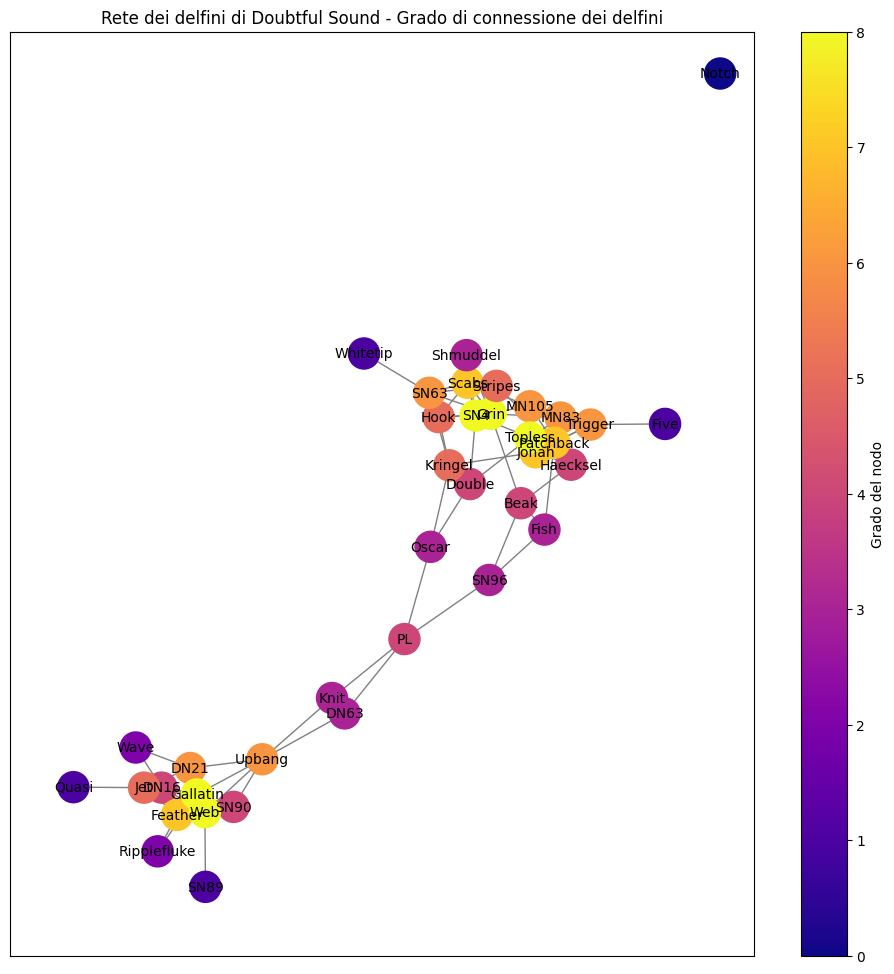

In [34]:
# Definire i colori dei nodi basati sul grado
colors = [degree_dict_sub[node] for node in subgraph.nodes()]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph)
nodes = nx.draw_networkx_nodes(subgraph, pos, node_size=500, node_color=colors, cmap=plt.cm.plasma) # Nodi con colori basati sul loro grado
edges = nx.draw_networkx_edges(subgraph, pos, edge_color="gray")
labels = nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color="black")

# Barra colori
plt.colorbar(nodes, label='Grado del nodo')
plt.title("Rete dei delfini di Doubtful Sound - Grado di connessione dei delfini")
plt.show()

## Centrality Measures

In [35]:
# Calcolare la centralità di grado per calcolare l'importanza di ciascun nodo
degree_centrality_sub = nx.degree_centrality(subgraph)

# Ordinare i nodi per centralità di grado (dal più alto al più basso)
sorted_degree_centrality_sub = {k: v for k, v in sorted(degree_centrality_sub.items(), key=lambda item: item[1], reverse=True)}

print("Degree centrality (dalla più grande alla più piccola):")
for node, centrality in sorted_degree_centrality_sub.items():
    print(f"Nodo {node}: {centrality:.4f}")

Degree centrality (dalla più grande alla più piccola):
Nodo Gallatin: 0.2162
Nodo Grin: 0.2162
Nodo SN4: 0.2162
Nodo Topless: 0.2162
Nodo Web: 0.2162
Nodo Feather: 0.1892
Nodo Jonah: 0.1892
Nodo Patchback: 0.1892
Nodo Scabs: 0.1892
Nodo DN21: 0.1622
Nodo MN105: 0.1622
Nodo MN83: 0.1622
Nodo SN63: 0.1622
Nodo Trigger: 0.1622
Nodo Upbang: 0.1622
Nodo Hook: 0.1351
Nodo Jet: 0.1351
Nodo Kringel: 0.1351
Nodo Stripes: 0.1351
Nodo Beak: 0.1081
Nodo DN16: 0.1081
Nodo Double: 0.1081
Nodo Haecksel: 0.1081
Nodo PL: 0.1081
Nodo SN90: 0.1081
Nodo DN63: 0.0811
Nodo Fish: 0.0811
Nodo Knit: 0.0811
Nodo Oscar: 0.0811
Nodo Shmuddel: 0.0811
Nodo SN96: 0.0811
Nodo Ripplefluke: 0.0541
Nodo Wave: 0.0541
Nodo Five: 0.0270
Nodo Quasi: 0.0270
Nodo SN89: 0.0270
Nodo Whitetip: 0.0270
Nodo Notch: 0.0000


In [36]:
# Calcolare la centralità di betweenness per calcolare l'importanza di ciascun nodo
betweenness_centrality_sub = nx.betweenness_centrality(subgraph)

# Ordinare i nodi per centralità di betweenness (dal più alto al più basso)
sorted_betweenness_centrality_sub = {k: v for k, v in sorted(betweenness_centrality_sub.items(), key=lambda item: item[1], reverse=True)}

print("Betweenness centrality (dalla più grande alla più piccola):")
for node, centrality in sorted_betweenness_centrality_sub.items():
    print(f"Nodo {node}: {centrality:.4f}")

Betweenness centrality (dalla più grande alla più piccola):
Nodo PL: 0.4700
Nodo Upbang: 0.4135
Nodo Oscar: 0.2785
Nodo DN63: 0.2072
Nodo Knit: 0.2072
Nodo SN96: 0.1779
Nodo Kringel: 0.1585
Nodo Web: 0.1115
Nodo Double: 0.1114
Nodo Gallatin: 0.1040
Nodo Beak: 0.1034
Nodo DN21: 0.0824
Nodo Grin: 0.0795
Nodo SN63: 0.0701
Nodo Patchback: 0.0655
Nodo Fish: 0.0645
Nodo SN4: 0.0577
Nodo Topless: 0.0537
Nodo Trigger: 0.0529
Nodo Jet: 0.0526
Nodo Jonah: 0.0492
Nodo MN105: 0.0163
Nodo MN83: 0.0161
Nodo Scabs: 0.0148
Nodo Haecksel: 0.0139
Nodo Stripes: 0.0116
Nodo Hook: 0.0112
Nodo SN90: 0.0098
Nodo Feather: 0.0097
Nodo DN16: 0.0044
Nodo Wave: 0.0004
Nodo Five: 0.0000
Nodo Notch: 0.0000
Nodo Quasi: 0.0000
Nodo Ripplefluke: 0.0000
Nodo Shmuddel: 0.0000
Nodo SN89: 0.0000
Nodo Whitetip: 0.0000


In [37]:
# Calcolare la centralità di closeness
closeness_centrality_sub = nx.closeness_centrality(subgraph)

# Ordinare la centralità di closeness dalla più grande alla più piccola
sorted_closeness_sub = sorted(closeness_centrality_sub.items(), key=lambda item: item[1], reverse=True)

print("Closeness centrality (dalla più grande alla più piccola):")
for node, closeness in sorted_closeness_sub:
    print(f"{node}: {closeness:.4f}")

Closeness centrality (dalla più grande alla più piccola):
PL: 0.3127
Oscar: 0.3073
Kringel: 0.2994
SN96: 0.2994
Double: 0.2968
Beak: 0.2895
DN63: 0.2871
Knit: 0.2871
Fish: 0.2802
Grin: 0.2780
Jonah: 0.2736
SN4: 0.2736
Topless: 0.2736
Patchback: 0.2715
SN63: 0.2634
Hook: 0.2614
Upbang: 0.2614
Haecksel: 0.2557
MN83: 0.2432
MN105: 0.2416
Scabs: 0.2416
Stripes: 0.2399
Trigger: 0.2351
Gallatin: 0.2274
Web: 0.2274
Shmuddel: 0.2260
DN21: 0.2245
SN90: 0.2189
Whitetip: 0.2085
Feather: 0.1946
Jet: 0.1925
DN16: 0.1904
Five: 0.1904
Ripplefluke: 0.1863
SN89: 0.1853
Wave: 0.1853
Quasi: 0.1614
Notch: 0.0000


In [38]:
# Calcolare la centralità di eigenvector con un massimo di 1000 iterazioni
eigenvector_centrality_sub = nx.eigenvector_centrality(subgraph, max_iter=1000)

# Calcolare la centralità di PageRank come alternativa alla centralità di eigenvector
pagerank_centrality_sub = nx.pagerank(subgraph)

# Rimuovere nodi isolati dalla sottorete per migliorare il calcolo della centralità
subgraph.remove_nodes_from(list(nx.isolates(subgraph)))

# Ordinare la centralità di eigenvector dalla più grande alla più piccola
sorted_eigenvector_sub = sorted(eigenvector_centrality_sub.items(), key=lambda item: item[1], reverse=True)

# Stampare la centralità di eigenvector ordinata
print("Eigenvector centrality (dalla più grande alla più piccola):")
for node, eigenvector in sorted_eigenvector_sub:
    print(f"{node}: {eigenvector:.4f}")

# Ordinare la centralità di PageRank dalla più grande alla più piccola
sorted_pagerank_sub = sorted(pagerank_centrality_sub.items(), key=lambda item: item[1], reverse=True)

# Stampare la centralità di PageRank ordinata
print("\nPageRank centrality (dalla più grande alla più piccola):")
for node, pagerank in sorted_pagerank_sub:
    print(f"{node}: {pagerank:.4f}")


Eigenvector centrality (dalla più grande alla più piccola):
Topless: 0.3347
SN4: 0.3174
MN105: 0.2925
Jonah: 0.2902
Patchback: 0.2880
Grin: 0.2869
Scabs: 0.2774
MN83: 0.2685
Trigger: 0.2520
Stripes: 0.2269
Hook: 0.2033
SN63: 0.1950
Haecksel: 0.1636
Shmuddel: 0.1466
Kringel: 0.1462
Double: 0.1410
Beak: 0.0909
Fish: 0.0678
Oscar: 0.0501
Five: 0.0419
Whitetip: 0.0324
SN96: 0.0287
PL: 0.0142
DN63: 0.0032
Knit: 0.0032
Upbang: 0.0020
Gallatin: 0.0016
Web: 0.0015
DN21: 0.0013
Feather: 0.0013
SN90: 0.0011
Jet: 0.0010
DN16: 0.0008
Ripplefluke: 0.0005
Wave: 0.0003
SN89: 0.0003
Quasi: 0.0002
Notch: 0.0000

PageRank centrality (dalla più grande alla più piccola):
Web: 0.0476
Gallatin: 0.0459
Feather: 0.0408
Grin: 0.0403
Topless: 0.0395
SN4: 0.0394
Upbang: 0.0359
DN21: 0.0356
Patchback: 0.0355
Scabs: 0.0351
Jonah: 0.0351
SN63: 0.0337
Trigger: 0.0327
Jet: 0.0320
MN83: 0.0304
MN105: 0.0299
Kringel: 0.0278
PL: 0.0270
Hook: 0.0263
Stripes: 0.0259
DN16: 0.0250
Beak: 0.0242
SN90: 0.0240
Double: 0.0226
Ha

In [39]:
# Calcolare la Load Centrality
load_centrality_sub = nx.load_centrality(subgraph)

# Ordinare la Load Centrality dalla più grande alla più piccola
sorted_load_centrality_sub = sorted(load_centrality_sub.items(), key=lambda item: item[1], reverse=True)

print("Load centrality (dalla più grande alla più piccola):")
for node, load in sorted_load_centrality_sub:
    print(f"{node}: {load:.4f}")

Load centrality (dalla più grande alla più piccola):
PL: 0.4968
Upbang: 0.4372
Oscar: 0.2857
DN63: 0.2190
Knit: 0.2190
SN96: 0.1968
Kringel: 0.1638
Web: 0.1179
Double: 0.1138
Beak: 0.1105
Gallatin: 0.1100
DN21: 0.0871
Grin: 0.0864
Patchback: 0.0770
Fish: 0.0762
SN63: 0.0725
SN4: 0.0590
Trigger: 0.0560
Jet: 0.0556
Topless: 0.0539
Jonah: 0.0516
MN83: 0.0173
MN105: 0.0163
Scabs: 0.0154
Haecksel: 0.0134
Stripes: 0.0118
SN90: 0.0103
Feather: 0.0102
Hook: 0.0101
DN16: 0.0047
Wave: 0.0004
Five: 0.0000
Quasi: 0.0000
Ripplefluke: 0.0000
Shmuddel: 0.0000
SN89: 0.0000
Whitetip: 0.0000


In [40]:
# Top 5 nodi per centralità di grado
top_degree_sub = sorted(degree_dict_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di grado:", top_degree_sub)

# Top 5 nodi per centralità di betweenness
top_betweenness_sub = sorted(betweenness_centrality_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di betweenness:", top_betweenness_sub)

# Top 5 nodi per centralità di closeness
top_closeness_sub = sorted(closeness_centrality_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di closeness:", top_closeness_sub)

# Top 5 nodi per centralità di eigenvector
top_eigenvector_sub = sorted(eigenvector_centrality_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di eigenvector:", top_eigenvector_sub)

# Top 5 nodi per centralità di eigenvector
top_pagerank_sub = sorted(pagerank_centrality_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di pagerank:", top_pagerank_sub)

# Top 5 nodi per centralità di eigenvector
top_load_sub = sorted(load_centrality_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di load:", top_load_sub)

Top 5 nodi per centralità di grado: [('Gallatin', 8), ('Grin', 8), ('SN4', 8), ('Topless', 8), ('Web', 8)]
Top 5 nodi per centralità di betweenness: [('PL', 0.46996996996997), ('Upbang', 0.41350278850278854), ('Oscar', 0.2785285285285286), ('DN63', 0.2072072072072072), ('Knit', 0.2072072072072072)]
Top 5 nodi per centralità di closeness: [('PL', 0.3127413127413128), ('Oscar', 0.30725462304409673), ('Kringel', 0.2993762993762994), ('SN96', 0.2993762993762994), ('Double', 0.29683921209344943)]
Top 5 nodi per centralità di eigenvector: [('Topless', 0.33469191553481026), ('SN4', 0.3173975498839757), ('MN105', 0.2925220041948924), ('Jonah', 0.2901897445250274), ('Patchback', 0.28801972344108095)]
Top 5 nodi per centralità di pagerank: [('Web', 0.04759633455826277), ('Gallatin', 0.045937093357513226), ('Feather', 0.04078288269889545), ('Grin', 0.04033624982921713), ('Topless', 0.039452242342671105)]
Top 5 nodi per centralità di load: [('PL', 0.49682539682539684), ('Upbang', 0.437202380952380

## Altre analisi del sottografo

### Omofilia

In [48]:
# Dizionario per mappare il nodo al sesso
sex_dict = dict(zip(sex_data['node'], sex_data['sex']))

# Sottorete con i nodi dal file dolphins_sex
nodes_of_interest = sex_data['node'].tolist()
subgraph = nx.Graph()

# Aggiungiamo i nodi e gli archi della sottorete dalla rete principale G
for node in nodes_of_interest:
    if node in G.nodes:
        subgraph.add_node(node, sex=sex_dict[node])
        for neighbor in G.neighbors(node):
            if neighbor in nodes_of_interest:
                subgraph.add_edge(node, neighbor)

# Coefficiente di assortatività per grado
degree_assortativity_sub = nx.degree_assortativity_coefficient(subgraph)
print(f"Coefficiente di assortatività per grado: {degree_assortativity_sub:.4f}")

unique_sexes = set(nx.get_node_attributes(subgraph, 'sex').values())

# Coefficiente di assortatività per sesso (se c'è varietà)
if len(unique_sexes) >= 2:
    sex_assortativity_sub = nx.attribute_assortativity_coefficient(subgraph, 'sex')
    print(f"Coefficiente di assortatività per sesso: {sex_assortativity_sub:.4f}")
else:
    print("Non è possibile calcolare l'assortatività per sesso.")

Coefficiente di assortatività per grado: 0.0189
Coefficiente di assortatività per sesso: 0.4476
